In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.api.types import is_numeric_dtype
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
for col in df.columns:
    num_dis_val = len(df[col].unique())
    print(f"{col} -> {num_dis_val} distinct values \n")

Pregnancies -> 17 distinct values 

Glucose -> 136 distinct values 

BloodPressure -> 47 distinct values 

SkinThickness -> 51 distinct values 

Insulin -> 186 distinct values 

BMI -> 248 distinct values 

DiabetesPedigreeFunction -> 517 distinct values 

Age -> 52 distinct values 

Outcome -> 2 distinct values 



In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df[df.duplicated(keep=False)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


C:\Users\baokh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\baokh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\baokh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float

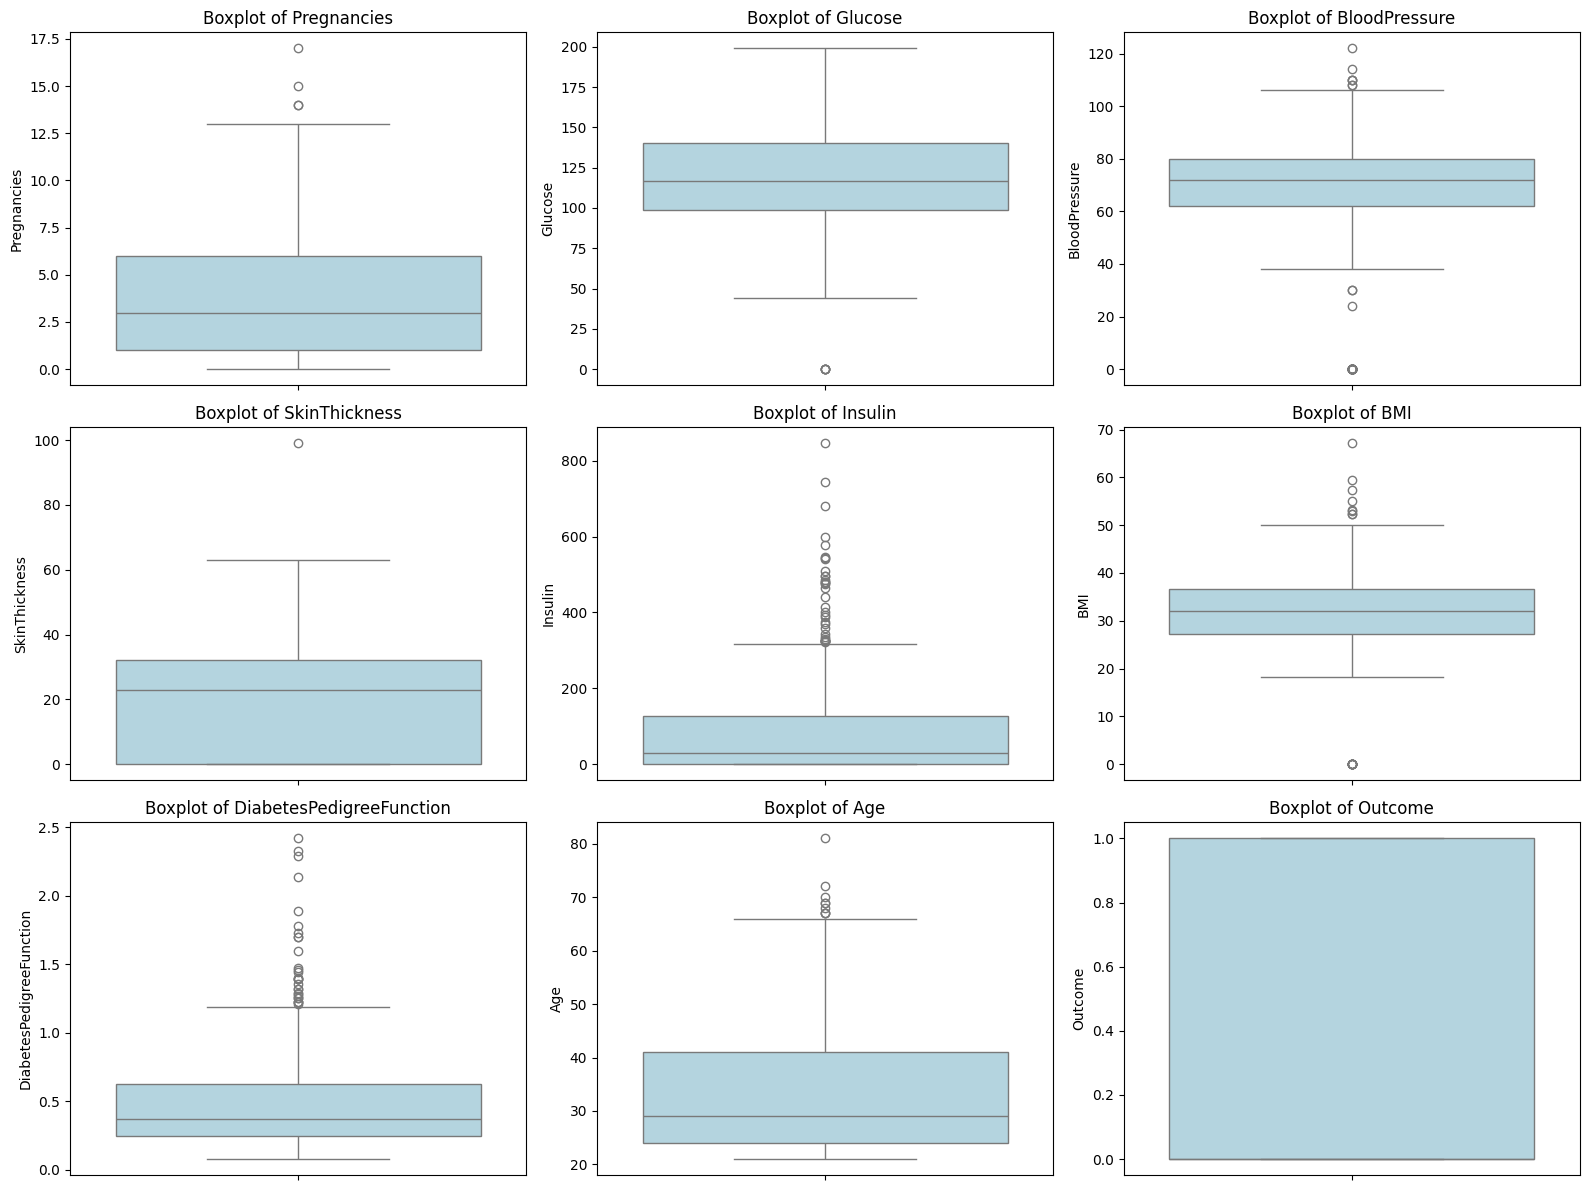

In [8]:
num_cols = df.select_dtypes(include="number").columns
cols = 3 
rows = math.ceil(len(num_cols) / cols)

plt.figure(figsize=(16,12))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols,i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}', fontsize=12)

plt.tight_layout()
plt.show()

In [9]:
val_counts = df['Outcome'].value_counts()

total = len(df['Outcome'])
proport_0 = val_counts[0] / total
proport_1 = val_counts[1] / total


if abs(proport_0 - proport_1) < 0.1:
    print("Balance")
else: 
    print("Imbalance")

Imbalance


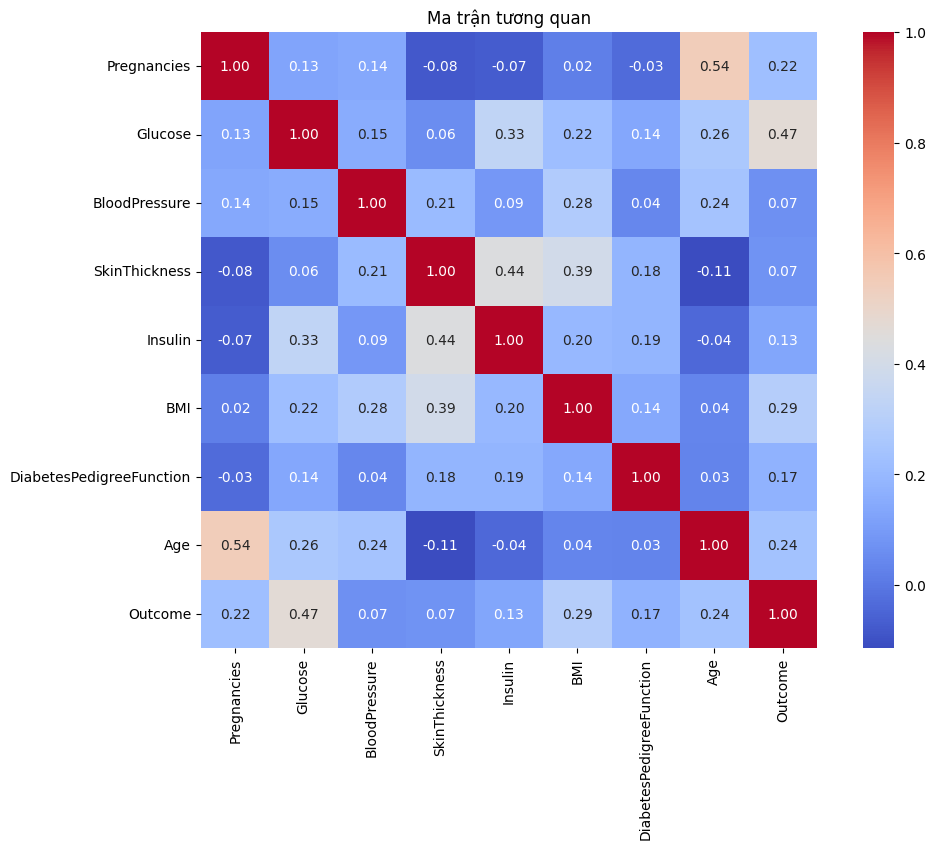

In [10]:
num_df = df.select_dtypes(include='number')
correlation_matrix = num_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Ma trận tương quan')
plt.show()

In [11]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=0)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

x_const = sm.add_constant(x_train_scaled)

model = sm.Logit(y_train, x_const)

result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.478404
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  512
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            8
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.2662
Time:                        21:23:35   Log-Likelihood:                -244.94
converged:                       True   LL-Null:                       -333.78
Covariance Type:            nonrobust   LLR p-value:                 3.160e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8298      0.118     -7.037      0.000      -1.061      -0.599
x1             0.3484      0.

In [12]:
df.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)
df

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0
766,1,126,0,30.1,0.349,47,1


Accuracy on Test Set: 0.7930
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       171
           1       0.74      0.58      0.65        85

    accuracy                           0.79       256
   macro avg       0.78      0.74      0.75       256
weighted avg       0.79      0.79      0.79       256

Confusion Matrix on Test Set:


Text(0.5, 23.52222222222222, 'Dự báo')

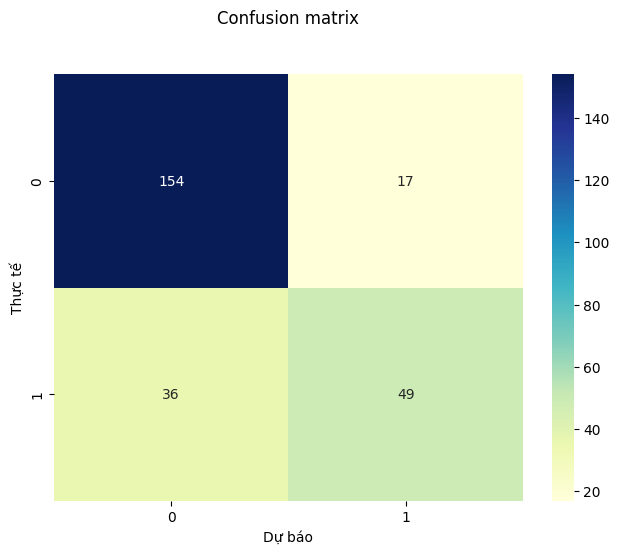

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

regression = LogisticRegression(solver='liblinear', max_iter=1000)

regression.fit(x_train_scaled, y_train)

y_pred = regression.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on Test Set: {accuracy:.4f}")

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix on Test Set:")
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')


In [14]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': 'accuracy'
}

# Cross-validation trên tập huấn luyện
cv_results = cross_validate(regression, x_train_scaled, y_train, cv=5, scoring=scoring)

print("Cross-Validation Results on Training Data:")
for metric, values in scoring.items():
    mean_score = cv_results[f'test_{metric}'].mean()
    std_score = cv_results[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: Mean = {mean_score:.4f}, Std = {std_score:.4f}")

# Đánh giá trên tập kiểm tra
y_test_pred = regression.predict(x_test_scaled)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print("\nEvaluation on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Cross-Validation Results on Training Data:
Precision: Mean = 0.7053, Std = 0.0831
Recall: Mean = 0.5734, Std = 0.0403
F1: Mean = 0.6295, Std = 0.0401
Accuracy: Mean = 0.7578, Std = 0.0347

Evaluation on Test Data:
Accuracy: 0.7930
Precision: 0.7424
Recall: 0.5765
F1-Score: 0.6490



Đánh giá mô hình ban đầu:
Accuracy on Test Set: 0.7383
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       171
           1       0.62      0.54      0.58        85

    accuracy                           0.74       256
   macro avg       0.70      0.69      0.69       256
weighted avg       0.73      0.74      0.73       256


K tối ưu nhất cho mô hình : 15

Đánh giá lại mô hình:
Accuracy on Test Set: 0.7500
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       171
           1       0.67      0.49      0.57        85

    accuracy                           0.75       256
   macro avg       0.72      0.69      0.70       256
weighted avg       0.74      0.75      0.74       256



Text(0.5, 23.52222222222222, 'Dự báo')

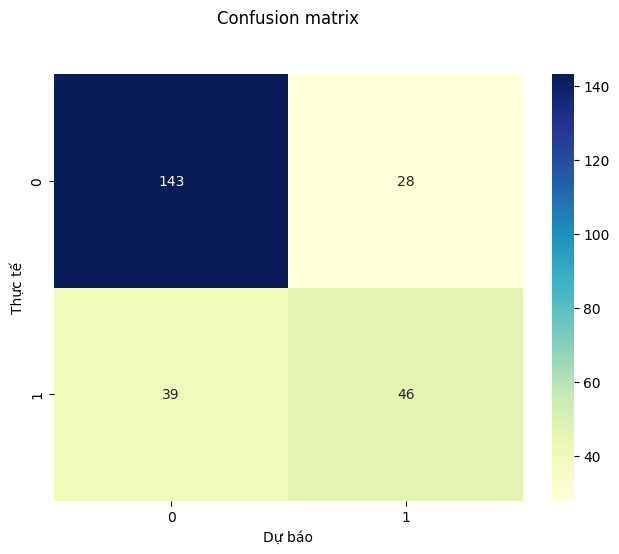

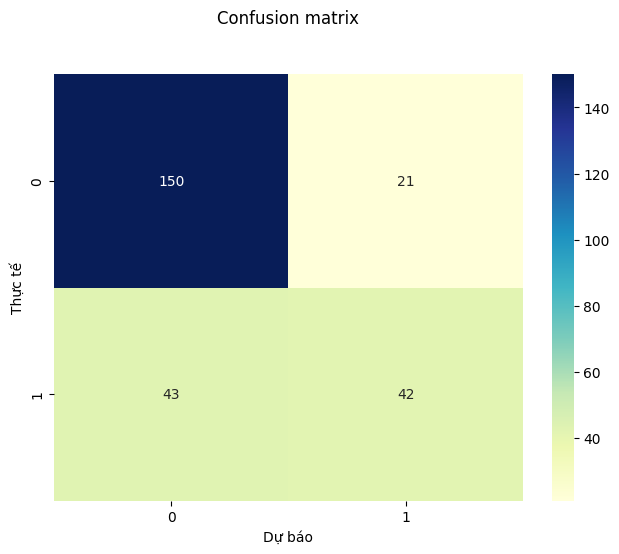

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_scaled, y_train)

#Dự đoán và đánh giá trên tập kiểm tra
y_pred = knn_model.predict(x_test_scaled)

print("\nĐánh giá mô hình ban đầu:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')


#Tìm giá trị tối ưu của k bằng Grid Search
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"\nK tối ưu nhất cho mô hình : {best_k}")

#Huấn luyện lại với k tối ưu
optimal_knn = KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(x_train_scaled, y_train)

#Dự đoán và đánh giá trên tập kiểm tra
y_pred_optimal = optimal_knn.predict(x_test_scaled)

print("\nĐánh giá lại mô hình:")
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy on Test Set: {accuracy_optimal:.4f}")
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_optimal))

cnf_matrix_optimal = metrics.confusion_matrix(y_test, y_pred_optimal)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_optimal), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [16]:
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': 'accuracy'
}

# Cross-validation trên tập huấn luyện
cv_results = cross_validate(optimal_knn, x_train_scaled, y_train, cv=5, scoring=scoring)


print("Cross-Validation Results on Training Data:")
for metric, values in scoring.items():
    mean_score = cv_results[f'test_{metric}'].mean()
    std_score = cv_results[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: Mean = {mean_score:.4f}, Std = {std_score:.4f}")

# Đánh giá trên tập kiểm tra
y_test_pred = optimal_knn.predict(x_test_scaled)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print("\nEvaluation on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Cross-Validation Results on Training Data:
Precision: Mean = 0.7421, Std = 0.1192
Recall: Mean = 0.4752, Std = 0.0684
F1: Mean = 0.5730, Std = 0.0583
Accuracy: Mean = 0.7480, Std = 0.0359

Evaluation on Test Data:
Accuracy: 0.7500
Precision: 0.6667
Recall: 0.4941
F1-Score: 0.5676
